## Shopify Technical Challenge

### Oscar Lewis


Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.
What metric would you report for this dataset?
What is its value?


#### Data Investigation


In [14]:
# Include Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", message="FixedFormatter")


In [2]:
data = pd.read_csv("sales_data.csv")
data.head()


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


The first step I take when looking at a new dataset is to visualize the distribution of the data. This allows me to begin to identify any outliers and helps to inform later decisions. During this time I will also check for any null values, as those could be throwing off our observations.


In [3]:
data.shape


(5000, 7)

In [4]:
data.isnull().sum()


order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

As we can see above, there are no null values in the dataset. Next I will use seaborn to graph


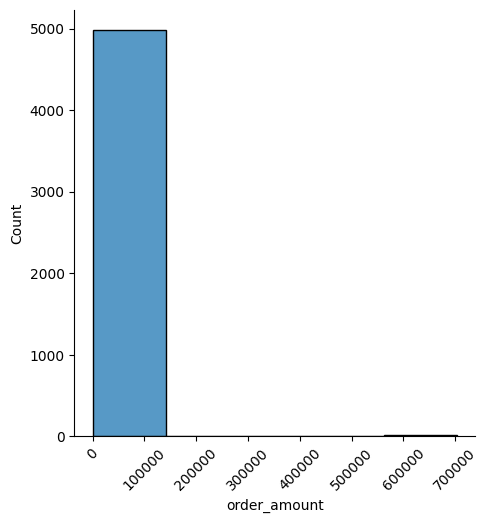

In [17]:
dis_graph = sns.displot(data, x="order_amount", bins=5)
for axes in dis_graph.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)


Let's take a look at some descriptive statistics about our sales data.

In [6]:
data.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [7]:
print(f"Standard deviation of order_amount is: {data.order_amount.std()}")

Standard deviation of order_amount is: 41282.539348788036


This is a very high standard deviation of AOV relative to the mean. This indicates that we have values that are very distant from the mean.

In [8]:
print(f"Median value of order_amount is: {data.order_amount.median()}")
print(f"Min value of order_amount is: {data.order_amount.min()}")
print(f"Max value of order_amount is: {data.order_amount.max()}")

Median value of order_amount is: 284.0
Min value of order_amount is: 90
Max value of order_amount is: 704000
